<a href="https://colab.research.google.com/github/borundev/fastai_examples/blob/main/fastbook_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqqq fastai

     |████████████████████████████████| 194kB 15.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 


In [2]:
from fastai.vision.all import *
#from fastai.data.external import untar_data,URLs
#from fastai.vision.data import ImageDataLoaders
#from fastai.data.transforms import get_image_files
#from fastai.vision.augment import Resize
#from fastai.vision.learner import cnn_learner
#from torchvision.models.resnet import resnet34
#from fastai.metrics import error_rate

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x):
  # check if first letter of x is uppercase 
  return x[0].isupper()

In [5]:
# label func gets the name of file as an argument
dls = ImageDataLoaders.from_name_func(
        path, get_image_files(path), valid_pct=0.2, seed=42,
        label_func=is_cat, item_tfms=Resize(224))

In [6]:
# dataloaders is an iterator over train and val
train,val=dls

In [7]:
x,y=next(iter(train))

In [8]:
type(x),type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorCategory)

In [9]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [10]:
# from fastai.callback.schedule import fine_tune
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.155448,0.019879,0.008119,00:46


epoch,train_loss,valid_loss,error_rate,time
0,0.052336,0.029349,0.006766,00:49


In [11]:
path = untar_data(URLs.CAMVID_TINY)

In [12]:
dls = SegmentationDataLoaders.from_label_func(
path, bs=8, fnames = get_image_files(path/"images"), label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}', codes = np.loadtxt(path/'codes.txt', dtype=str)
    )

In [14]:
train,val = dls

In [16]:
x,y = next(iter(train))

In [18]:
type(x),type(y)

(fastai.torch_core.TensorImage, fastai.torch_core.TensorMask)

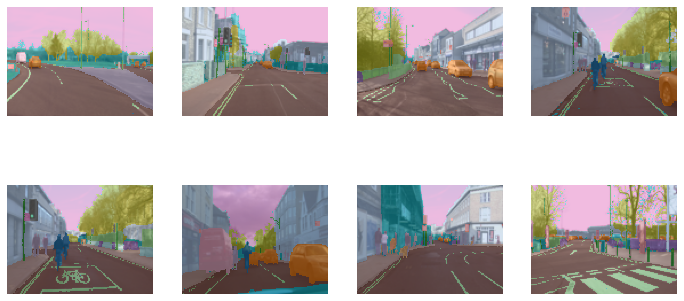

In [20]:
dls.show_batch()

In [21]:
learn = unet_learner(dls, resnet34)

In [22]:
  learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.150843,2.730093,00:03


epoch,train_loss,valid_loss,time
0,1.931617,1.510856,00:01
1,1.661578,1.557135,00:01
2,1.505364,1.253841,00:01
3,1.345897,0.997143,00:01
4,1.204431,0.851152,00:01
5,1.079316,0.776620,00:01
6,0.981378,0.768135,00:01
7,0.905580,0.755896,00:01


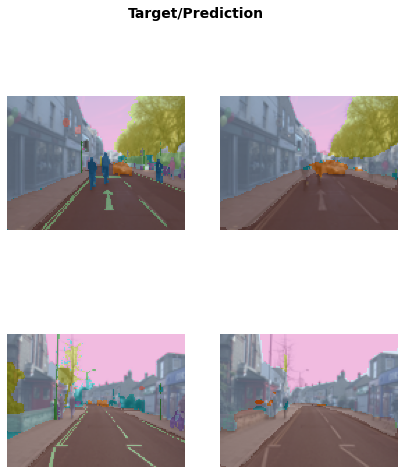

In [23]:
learn.show_results(max_n=6, figsize=(7,8))

In [24]:
from fastai.text.all import *

In [25]:
dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [28]:
train,_ = dls
x,y = next(iter(train))

In [30]:
type(x),type(y)

(fastai.text.data.TensorText, fastai.torch_core.TensorCategory)

In [38]:
x

TensorText([[    2,     8,  1147,  ...,    13,     7, 16078],
        [    1,     1,     1,  ...,     1,     1,     1],
        [    1,     1,     1,  ...,     1,     1,     1],
        ...,
        [    1,     1,     1,  ...,     1,     1,     1],
        [    1,     1,     1,  ...,     1,     1,     1],
        [    1,     1,     1,  ...,     1,     1,     1]], device='cuda:0')

In [39]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.268354,0.232876,0.908160,03:43


epoch,train_loss,valid_loss,accuracy,time
0,0.244892,0.235679,0.905280,06:52
1,0.223387,0.189932,0.925000,06:51
2,0.166075,0.182324,0.931040,06:51
3,0.123215,0.198885,0.931200,06:51


In [40]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([0.0037, 0.9963]))

In [42]:
from fastai.tabular.all import * 
path = untar_data(URLs.ADULT_SAMPLE)

In [43]:
 dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
        cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                     'relationship', 'race'],
        cont_names = ['age', 'fnlwgt', 'education-num'],
        procs = [Categorify, FillMissing, Normalize])

In [44]:
train, _ = dls

In [49]:
x,y,z=next(iter(train))

In [50]:
type(x),type(y),type(z)

(torch.Tensor, torch.Tensor, torch.Tensor)

In [52]:
x[:5]

tensor([[ 5,  2,  5,  4,  4,  5,  1],
        [ 5, 10,  3, 13,  1,  5,  1],
        [ 5, 16,  5,  4,  2,  5,  1],
        [ 6, 10,  3, 11,  1,  5,  1],
        [ 3, 12,  7,  5,  3,  5,  1]], device='cuda:0')

In [53]:
y[:5]

tensor([[-1.5861, -0.1523, -1.2128],
        [-0.4853, -0.9649,  1.1471],
        [-0.1917,  0.0982, -0.0328],
        [ 1.4228,  0.6501,  1.1471],
        [ 2.3768,  0.3693, -0.4262]], device='cuda:0')

In [58]:
z[:5]

tensor([[0],
        [0],
        [0],
        [1],
        [0]], device='cuda:0', dtype=torch.int8)

In [55]:
learn = tabular_learner(dls, metrics=accuracy)

In [56]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364921,0.361274,0.827549,00:04
1,0.365894,0.350534,0.835842,00:04
2,0.353601,0.347860,0.838913,00:04


In [57]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv') 
learn = collab_learner(dls, y_range=(0.5,5.5)) 

In [61]:
len(next(iter(dls)))

75

In [62]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.497175,1.435366,00:00


epoch,train_loss,valid_loss,time
0,1.372593,1.373977,00:00
1,1.278242,1.184971,00:00
2,1.024182,0.865412,00:00
3,0.809809,0.713256,00:00
4,0.703678,0.667877,00:00
5,0.659535,0.654041,00:00
6,0.633702,0.648165,00:00
7,0.631355,0.644698,00:00
8,0.612331,0.643554,00:00
9,0.606961,0.643432,00:00


In [63]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,53.0,54.0,5.0,4.497546
1,24.0,5.0,4.5,3.486808
2,51.0,72.0,4.0,3.326377
3,47.0,44.0,2.5,3.134516
4,76.0,21.0,4.0,3.393330
5,71.0,81.0,4.5,4.312553
6,100.0,87.0,4.0,3.518161
7,19.0,79.0,4.5,4.008976
8,95.0,65.0,4.0,3.849850
